In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date,timedelta
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

Question 1&2

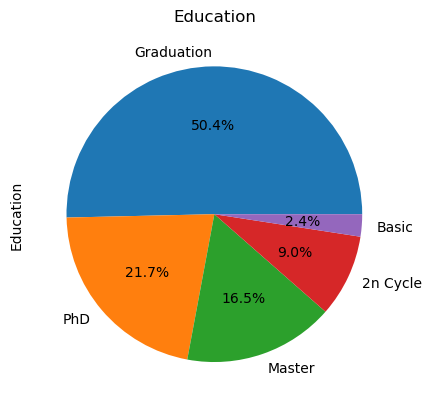

Education         object
Marital_Status    object
dtype: object


In [94]:
#Create Dataframe from csv
data = pd.read_csv('marketing_campaign.csv',delimiter= '\t')
df = pd.DataFrame(data)

df.dropna(inplace=True) #may need to change inplace to false

#Change Dt_Customer column to datetime object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
#Create a pie chart for the education column
Education = df['Education'].value_counts()
Education.plot.pie(title='Education', autopct='%1.1f%%')
plt.show()
#find all dtype objects in the dataframe
print(df.dtypes[df.dtypes == 'object'])


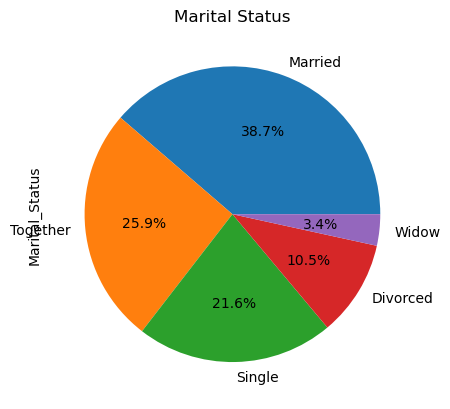

['Single' 'Together' 'Married' 'Divorced' 'Widow']


In [95]:
#Change the Values of YOLO or Absurd or Alone to Single
df.loc[(df['Marital_Status'] == 'YOLO') | 
       (df['Marital_Status'] == 'Absurd') | 
       (df['Marital_Status'] == 'Alone'),'Marital_Status'] = 'Single'
#Create a pie chart for the Marital Status column
MaritalStatus = df['Marital_Status'].value_counts()
MaritalStatus.plot.pie(title='Marital Status', autopct='%1.1f%%')
plt.show()
#print the unique values in marital status
print(df['Marital_Status'].unique())

Question 3

In [96]:
#get the current date
df['Customer_For'] = pd.to_datetime(date.today())
#subtract the number of days since the customer's last visit
df['Customer_For'] = df['Customer_For'] - pd.to_timedelta(df['Recency'],unit='D')
#subtract the dates of the customer's first and last visit
df['Customer_For'] = df['Customer_For'] - df['Dt_Customer']

#get the current year - the date of the customer's birth
df['Age'] = date.today().year - df['Year_Birth']

# get the total amount of money spent by the customer in the last 2 years
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntGoldProds']

#Get the number of children in the customer's family
df['Children'] = df['Kidhome'] + df['Teenhome']

#if marital status is together or married
#we increment family size by 2
#else we increment by 1
df['Family_Size'] = df['Marital_Status'].apply(lambda x: 2 if (x == 'Married') | (x == 'Together') else 1)
#Increment the family size by the number of children in the family
df['Family_Size'] += df['Children']

#If customer has at least 1 child,he is a parent
df['Is_Parent'] = df['Children'].apply(lambda x: 1 if x >=1 else 0)

#Check if customer is alone or has a partner
df['Living_With'] = df['Marital_Status'].apply(lambda x: 'Partner' if (x == 'Married') | (x == 'Together') else 'Alone')

#Create Age groups
def Age_Sort(x):
    if x <= 30:
        return '21-30'
    elif x <= 40:
        return '31-40'
    elif x <= 50:
        return '41-50'
    elif x <= 60:
        return '51-60'
    elif x <= 70:
        return '61-70'
    elif x <= 80:
        return '71-80'
    else:
        return '>80'
#apply the function to the age column
df['Age_Group'] = df['Age'].apply(Age_Sort)

Question 4

In [97]:
#A standard z-score function
def zscore(col):
    return (col - np.mean(col)) / np.std(col)
#calculate the z-score for the Year birth column
#Exclude the extreme values
z_scores = zscore(df['Year_Birth'])
df =  df[(z_scores <= 3) & (z_scores >= -3)]

#Calculate z score for the income column
z_scores = zscore(df['Income'])
df =  df[(z_scores <= 3) & (z_scores >= -3)]

#Calculate z score for the Spent Column
z_scores = zscore(df['Spent'])
df =  df[(z_scores <= 3) & (z_scores >= -3)]

#Calculate z score for the Num Deals Purchases Column
z_scores = zscore(df['NumDealsPurchases'])
df =  df[(z_scores <= 3) & (z_scores >= -3)]

Question 7

In [101]:
#Transform the Living With column
encoder = LabelEncoder()

encoder.fit(df['Living_With'])
df['Living_With'] = encoder.transform(df['Living_With'])

#Transform the Marital status column
encoder.fit(df['Marital_Status'])
df['Marital_Status'] = encoder.transform(df['Marital_Status'])

#Transform the Marital status column
encoder.fit(df['Education'])
df['Education'] = encoder.transform(df['Education'])

#Create a copy of the dataframe
new_df = df.copy()

#Delete the non useful columns
del new_df['AcceptedCmp1']
del new_df['AcceptedCmp2']
del new_df['AcceptedCmp3']
del new_df['AcceptedCmp4']
del new_df['AcceptedCmp5']
del new_df['Complain']
del new_df['Response']
del new_df['Dt_Customer']
del new_df['Age_Group']
del new_df['Customer_For']
#hold the columns since the output of transform is a numpy array
df_columns = new_df.columns

#Standardize the new dataframe
scaler = StandardScaler()
scaler.fit(new_df)
new_df = scaler.transform(new_df)

#return to the dataframe form
new_df = pd.DataFrame(new_df,columns=df_columns)




4
